In [19]:
from datetime import datetime
from portfolio.equity_portfolio import EquityPortfolio
from analyzer.analyzer import Analyzer as a
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
start = datetime(2017,1,1)
end = datetime(2021,1,1)

In [21]:
ep = EquityPortfolio(start,end,"portfolio",seats=10,strats=
                    {
                        "rolling_percent":{"params":{"timeframe":"daily"
                ,"requirement":5
                ,"days":100
                ,"value":False
                ,"currency":"prices"}},
                            "progress_report":{"params":{"timeframe":"quarterly"
                    ,"requirement":10}},
                    "financial_predict":{"params":{}},
                    })

In [22]:
ep.strats

{'rolling_percent': {'params': {'timeframe': 'daily',
   'requirement': 5,
   'days': 100,
   'value': False,
   'currency': 'prices'}},
 'progress_report': {'params': {'timeframe': 'quarterly', 'requirement': 10}},
 'financial_predict': {'params': {}}}

In [23]:
ep.load()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.74s/it]


In [6]:
ep.transform()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.82it/s]


In [7]:
ep.sim()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.60s/it]


In [24]:
trades = ep.backtest()

backtesting_seats:   0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  10%|████████▎                                                                          | 1/10 [00:04<00:37,  4.11s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  20%|████████████████▌                                                                  | 2/10 [00:08<00:36,  4.55s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  30%|████████████████████████▉                                                          | 3/10 [00:16<00:41,  5.88s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  40%|█████████████████████████████████▏                                                 | 4/10 [00:21<00:33,  5.50s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  50%|█████████████████████████████████████████▌                                         | 5/10 [00:30<00:33,  6.72s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize


Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize


backtesting_seats:  60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:36<00:25,  6.46s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  70%|██████████████████████████████████████████████████████████                         | 7/10 [00:43<00:20,  6.81s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to l


backtesting_seats:  80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:53<00:15,  7.73s/it]


Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:  90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:58<00:06,  6.92s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize
Cannot convert tz-naive Timestamp, use tz_localize to localize



 33%|██████████████████████████████████▎                                                                    | 1/3 [01:08<02:16, 68.19s/it]

Cannot convert tz-naive Timestamp, use tz_localize to localize



backtesting_seats:   0%|                                                                                           | 0/10 [00:00<?, ?it/s]

single positional indexer is out-of-bounds



backtesting_seats:  10%|████████▎                                                                          | 1/10 [00:02<00:24,  2.74s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  20%|████████████████▌                                                                  | 2/10 [00:11<00:51,  6.48s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  30%|████████████████████████▉                                                          | 3/10 [00:20<00:53,  7.60s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  40%|█████████████████████████████████▏                                                 | 4/10 [00:28<00:46,  7.74s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  50%|█████████████████████████████████████████▌                                         | 5/10 [00:40<00:45,  9.07s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:45<00:31,  7.92s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  70%|██████████████████████████████████████████████████████████                         | 7/10 [00:51<00:21,  7.27s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:01<00:15,  7.95s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:11<00:08,  8.76s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats: 100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:21<00:00,  8.15s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  10%|████████▎                                                                          | 1/10 [00:01<00:15,  1.71s/it]

single positional indexer is out-of-bounds



backtesting_seats:  40%|█████████████████████████████████▏                                                 | 4/10 [00:06<00:10,  1.75s/it]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds



backtesting_seats:  80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:13<00:02,  1.44s/it]

single positional indexer is out-of-bounds



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:57<00:00, 59.22s/it]


In [25]:
pva = a.pv_analysis(ep)
iva = a.industry_analysis(ep)

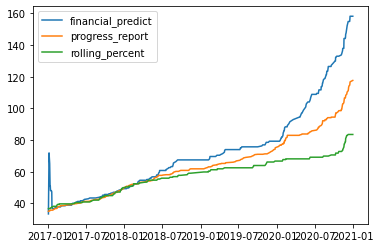

In [26]:
plt.plot(pva["date"],pva["progress_report"])
plt.plot(pva["date"],pva["rolling_percent"])
plt.plot(pva["date"],pva["financial_predict"])
plt.legend([x for x in pva.columns if x != "date"])

In [27]:
pva["total"] = [sum([row[1][x] for x in pva.columns if x not in ["date"]]) for row in pva.iterrows()]
pva

strategy,date,financial_predict,progress_report,rolling_percent,total
0,2017-01-03,36.666667,33.333333,35.000000,105.000000
1,2017-01-06,36.666667,71.872219,35.175000,143.713886
2,2017-01-09,36.666667,65.191377,35.175000,137.033044
3,2017-01-10,36.666667,56.733607,35.350000,128.750273
4,2017-01-11,36.666667,50.889884,35.525000,123.081551
...,...,...,...,...,...
313,2020-12-14,83.522129,154.904638,114.607457,353.034224
314,2020-12-15,83.522129,156.170471,115.327781,355.020380
315,2020-12-16,83.522129,158.209107,116.715259,358.446495
316,2020-12-21,83.522129,158.209107,117.116363,358.847599


In [29]:
iva

,year,quarter,strategy,GICS Sector,delta
0,2018,1,financial_predict,Consumer Discretionary,0.1
1,2019,3,financial_predict,Communication Services,0.1
2,2019,1,progress_report,Consumer Discretionary,0.1
3,2019,1,progress_report,Health Care,0.1
4,2019,3,progress_report,Information Technology,0.1
5,2018,3,progress_report,Consumer Discretionary,0.1
6,2019,1,financial_predict,Energy,0.1
7,2020,3,financial_predict,Industrials,0.1
8,2017,3,progress_report,Consumer Discretionary,0.1
9,2017,4,financial_predict,Information Technology,0.1
